Información del DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float

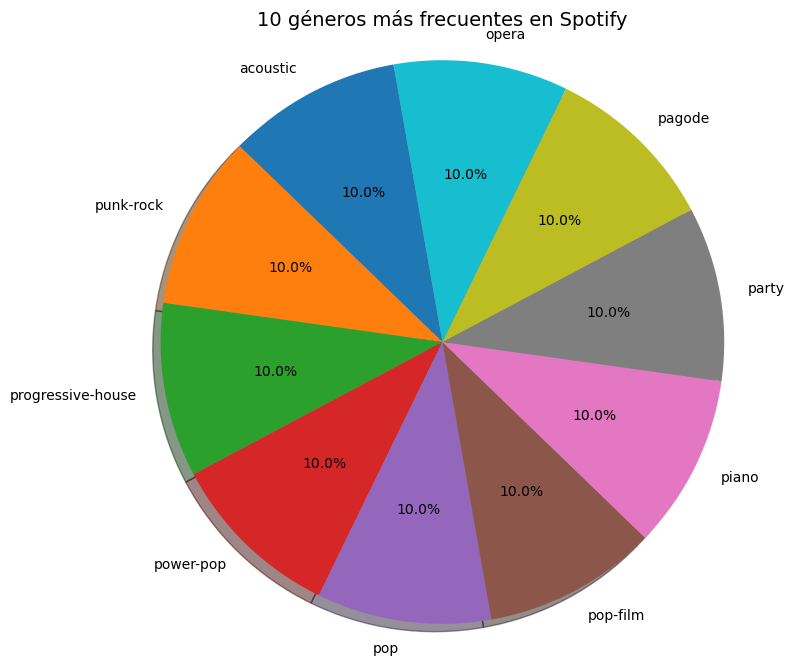

Canciones duplicadas encontradas:
                                               track_name  \
93440                  "Don Carlos" Roderigo'S Death Aria   
93397                  "Don Carlos" Roderigo'S Death Aria   
16385                      "Hark! The Herald Angels Sing"   
39446                      "Hark! The Herald Angels Sing"   
111402  "Was He Slow?" - Music From The Motion Picture...   
111315  "Was He Slow?" - Music From The Motion Picture...   
32514                                                  #3   
4152                                                   #3   
61045                                           #おふしょるにっと   
63939                                           #おふしょるにっと   
15476                              $tars and I feel alone   
94427                              $tars and I feel alone   
62864                                             '74-'75   
63412                                             '74-'75   
48913               '98 To Piano [Mix Cut] - Origin

In [ ]:
import pandas as pd 

#Importar Archivo CSV
file_path = r"C:\Users\rodri\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\Documentos\Semestre 5\Arte de la Analítica\spotify.csv"
data = pd.read_csv(file_path)

#Extraer información del archivo
print('Información del DataFrame: ')
data.info()

#Encontrar cuales y cuantos valores faltantes hay en la base de datos
valnul = data.isnull().sum()
print("Valores Nulos por columna: ")
print(valnul)

#Filtrar canciones por género
def filter_by_genre(df, genre):
    return df[df['track_genre'].str.contains(genre, case=False, na=False)][
        ['track_name', 'artists', 'album_name', 'popularity', 'track_genre']
    ]

#Contar cuantas veces se menciona un artista en la base de datos
def count_tracks_by_artist(df, artist_name):
    return df[df['artists'].str.contains(artist_name, case=False, na=False)].shape[0]

#Obtener las canciones con mayor popularidad
def most_popular_tracks(df, top_n=10):
    return df[['track_name', 'artists', 'popularity', 'track_genre']].sort_values(
        by='popularity', ascending=False
    ).head(top_n)

#Mostrar canciones de Rock
rock_tracks = filter_by_genre(data, 'rock')
print("Tracks de género Rock: ")    
print(rock_tracks.head(10))

#Artista con más canciones en la base de datos
artist_count = count_tracks_by_artist(data, 'Adele')
print(f"Número de tracks del artista Adele:")
print(artist_count)

#Las diez canciones más populares
top_tracks = most_popular_tracks(data, top_n=10)
print("Top 10 tracks más populares: ")
print(top_tracks)

#Gráfico de Pie para ver los 10 géneros más frecuentes.:
        #se puede concluir que hay la misma cantidad de canciones de cada género en la base de datos
import matplotlib.pyplot as plt
genre_counts = data['track_genre'].value_counts()
top_genres = genre_counts.head(10)
plt.figure(figsize=(8, 8))
plt.pie(
    top_genres, 
    labels=top_genres.index, 
    autopct='%1.1f%%', 
    startangle=100, 
    shadow=True
)
plt.title('10 géneros más frecuentes en Spotify', fontsize=14)
plt.axis('equal') 
plt.show()

#Encontrar cuales canciones están duplicadas
duplicated_tracks = data[data.duplicated(subset='track_name', keep=False)]
print("Canciones duplicadas encontradas:")
print(duplicated_tracks[['track_name', 'artists']].sort_values('track_name').head(20))

#Eliminar duplicados y verificar cuanto se redujo la base de datos
data_clean = data.drop_duplicates(subset='track_name', keep='first').reset_index(drop=True)
print("Tamaño original:", data.shape)
print("Tamaño después de eliminar duplicados:", data_clean.shape)
print("Duplicados restantes:", data_clean.duplicated(subset='track_name').sum())

#Análisis estadístico descriptivo de las canciones
print("\nEstadísticas descriptivas de las variables numéricas:")
des_stats = data_clean.describe()
print(des_stats)
#La base de datos tiene 73,609 canciones, donde la popularidad promedio es de 34.4 puntos. 
#La duración promedio de las canciones es de  232,000 milisegundos, osea casi 4 minutos, en donde el rango oscila entre 3 y 4.5 minutos
#En cuanto a la bailabilidad, el promedio es de 0.56, indicando que más de la mitad de las canciones se consideran'bailables'.
#La energía promedio de las canciones es de 0.64, indicando que la base de datos tiende a tener canciones con un nivel 'alto' de energía.
#La acústica media ese de 0.33, lo que  muestra una presencia baja de instrumentos de este tipo en comparación a los electrónicos.
#La instrumentalidad es de 0.18, lo que significa que la mayoría de las canciones incluyen una voz.
#El tempo promedio es de 122 BPM que se considera relativamente rápido y se suele encontrar en canciones pop y electrónicas.
